In [2]:
import numpy as np
import math

In [83]:
'''
whole functions for 2D HP Absolute calculator
'''

def check_contact_list(current_contact, contacts, contact_threshold):
    contact_check = False
    for i in range(len(contacts)):
        contact_count = 0
        for j in range(len(contacts[i])):
            for k in range(len(current_contact)):
                if(np.array_equal(current_contact[k],contacts[i][j])):
                    contact_count += 1
        if contact_count >= contact_threshold:
            contact_check = True
            break
    return contact_check

def count_HP_2D_contacts_absolute(move_seq, hp_seq):
    '''
    count the contacts within protein (H-H, P-P, H-P) and return the contact tuples
    abs move : clockwise, 0=N, 1=E, 2=S, 3=W, OR None if initial amino acid (which doesnt have any move)
    hp set : 0=P, 1=H
    move length = N-1 ; seq length = N
    '''
    
    move_len = len(move_seq)
    seq_len = len(hp_seq)
    coords = np.zeros((seq_len,2))
    
    #coordinate data structure
    list_coord_dict = []
    
    #movement coordinate translation
    move_N = np.array([0,1])
    move_E = np.array([1,0])
    move_S = np.array([0,-1])
    move_W = np.array([-1,0])
    moves_coor = np.array([move_N, move_E, move_S, move_W])
    
    #interpret the movements to coordinate
    
    coord_dict = {"type":hp_seq[0], "coord":coords[0], "move":None}
    list_coord_dict.append(coord_dict)
    
    for i in range(1, seq_len):
        '''
        if move_seq[i-1] == 0 :
            coord[i] = coord[i-1] + move_N
        elif move_seq[i-1] == 1 :
            coord[i] = coord[i-1] + move_E
        elif move_seq[i-1] == 2 :
            coord[i] = coord[i-1] + move_S
        elif move_seq[i-1] == 3 :
            coord[i] = coord[i-1] + move_W
        '''  
        coords[i] = coords[i-1] + moves_coor[move_seq[i-1]]
        coord_dict = {"type":hp_seq[i], "coord":coords[i], "move":move_seq[i-1]}
        list_coord_dict.append(coord_dict)
    #print(list_coord_dict)
    
    #find contacts (which is adjacent neighbour but not connected (i & k>=i+3))
    contacts = []
    for i in range(1, len(coords)):
        #check each 4 directions:
        for j in range(len(moves_coor)):
            contact = {}
            neighbour_coor = coords[i]+moves_coor[j]
            current_contact = (coords[i], neighbour_coor)
            
            #get the type of contact
            #if()
            
            #check if terminal
            if i == len(coords)-1:
                #check if not i-1
                contact_rule = (not np.array_equal(neighbour_coor, coords[i-1])) and (neighbour_coor.tolist() in coords.tolist())
                #threshold = 2 because the contact list only has at most 2 members
                unique_contact = check_contact_list(current_contact, contacts, 2)
                #if isnt direct neighbor and is not already evaluated
                if contact_rule and (not unique_contact):
                    contacts.append(current_contact)
            else:
                #check if not direct neighbours
                contact_rule = ( (not np.array_equal(neighbour_coor, coords[i+1])) and (not np.array_equal(neighbour_coor, coords[i-1])) ) and (neighbour_coor.tolist() in coords.tolist())
                #if isnt direct neighbor and is not already evaluated
                unique_contact = check_contact_list(current_contact, contacts, 2)
                if contact_rule and (not unique_contact):
                    contacts.append(current_contact)

    '''
    ==>to be continued with contact type identification & set unique contacts
    '''
    #identify contact types
    list_contact_dict = []
    for i in range(len(contacts)):
        contact_dict = {"coord":contacts[i]}
        contact_type = []
        for j in range(len(list_coord_dict)):
            if(np.array_equal(contacts[i][0], list_coord_dict[j]["coord"])):
                contact_type.append(list_coord_dict[j]["type"])
            if(np.array_equal(contacts[i][1], list_coord_dict[j]["coord"])):
                contact_type.append(list_coord_dict[j]["type"])
        contact_dict["type"] = np.array(sorted(contact_type))
        list_contact_dict.append(contact_dict)
        
    print(list_contact_dict)
                    
    #count each types
    contact_count_dict = {'HH':0, 'HP':0, 'PP':0}
    for contact_dict in list_contact_dict:
        type_HH = np.array([1,1])
        type_HP = np.array([0,1])
        type_PP = np.array([0,0])
        if np.array_equal(type_HH, contact_dict["type"]):
            contact_count_dict['HH'] += 1
        elif np.array_equal(type_HP, contact_dict["type"]):
            contact_count_dict['HP'] += 1
        elif np.array_equal(type_PP, contact_dict["type"]):
            contact_count_dict['PP'] += 1
    
    print(contact_count_dict)
    
    return contacts

def protein_fitness(EHH, EHP, EPP, count_HH, count_HP, count_PP):
    return (EHH*count_HH) + (EHP*count_HP) + (EPP*count_PP)


In [84]:
#0=P, 1=H
#moveset is always N-1 if seq is N
ms = [1,2,3,3,0,0,1,1]
hps = [1,0,0,1,0,1,1,1,1]


protein = ([],[])

con = count_HP_2D_contacts_absolute(ms, hps)
print(con)

[{'coord': (array([1., 0.]), array([1., 1.])), 'type': array([0, 1])}, {'coord': (array([ 0., -1.]), array([0., 0.])), 'type': array([1, 1])}, {'coord': (array([-1.,  0.]), array([0., 0.])), 'type': array([1, 1])}, {'coord': (array([0., 1.]), array([0., 0.])), 'type': array([1, 1])}]
{'HH': 3, 'HP': 1, 'PP': 0}
[(array([1., 0.]), array([1., 1.])), (array([ 0., -1.]), array([0., 0.])), (array([-1.,  0.]), array([0., 0.])), (array([0., 1.]), array([0., 0.]))]


In [57]:
a = np.array([np.array([1,0]), np.array([-1,0])])
b = np.array([np.array([0,0]), np.array([-1,0])])
#a=[[1,0],[-1,0]]
print(sorted('PH'))
np.array_equal(a,b)

['H', 'P']


False

In [4]:
def clip_boundary(vec, domain):
    '''
    to make sure the vector is within domain,
    if outside, clip them
    '''
    dim = len(domain)
    for i in range(dim):
        if(vec[i]<domain[i][0]):
            vec[i] = domain[i][0]
        elif(vec[i]>domain[i][1]):
            vec[i] = domain[i][1]
    return vec

def differential_evolution(F, domain, pop_n, mut_weight, CR, itr, stop_threshold, scheme=None, log=True):
    '''
    differential evolution for minimization problems
    params
        F : function to be optimized
        domain : domain within dimension D = [[low,up],...]
        init_pop : initial population, must be N>=4
        mut_weight : mutation weight
        CR : crossover probability rate
        scheme : DE/x/y/z -> ("x","y","z") e.g : ("rand",1,"bin") \\ not yet implemented
    '''
    #generate population with N>=4 within domain within dim dimension
    dim = len(domain)
    population = np.array([np.random.uniform(low=domain[i][0], high=domain[i][1], size=(pop_n,)) for i in range(dim)]).T
    
    it=0
    fittest_F = math.inf
    while((it<itr) and (fittest_F>stop_threshold)):
        if log:
            print("iter : ",it)
            fittest_vec = None
        for i in range(pop_n):
            #target vector = i
            tar_vec = population[i]
            
            #mutation
            dist_vec_idx = [j for j in range(pop_n) if j!=i]
            donor_vec = None
            #default scheme, rand/1/bin
            if not scheme:
                #x/y : rand/1 mutation scheme
                dist_vec_idx = np.random.choice(dist_vec_idx, 3, False)
                donor_vec = population[dist_vec_idx[0]] + (mut_weight*(population[dist_vec_idx[1]]-population[dist_vec_idx[2]]))
                # clip out of bound vectors
                donor_vec = clip_boundary(donor_vec, domain)
            else:
                if(scheme[0]=='best'):
                    dist_vec = [population[j] for j in dist_vec_idx]
                    best_vec_idx = np.argmin(np.array([F(j) for j in dist_vec]))
                    dist_vec_idx = []
            #elif (scheme[0]=="best"):
                #x/y : best/1 mutation scheme
                #[1,2,3], [4.654,1.53453, 0.3245]
                #dist_vec = [population[j] for j in dist_vec_idx]
                #best_vec_idx = np.argmin(np.array([F(j) for j in dist_vec]))
                #dist_vec_idx = []
                
            
            #crossover
            #binomial crossover
            jr = np.random.randint(dim, size=1)
            crossover_idx = np.random.uniform(0, 1, dim) <= CR
            u_vec = np.zeros(dim)
            for j in range(dim):
                if (crossover_idx[j] == True) or (j == jr):
                    u_vec[j] = donor_vec[j]
                else:
                    u_vec[j] = tar_vec[j]
            #print(tar_vec, donor_vec, crossover_idx, jr, u_vec)
            
            #selection, minimization
            if F(u_vec) <= F(tar_vec) :
                population[i] = u_vec
            
            fitness_array = np.array([F(population[j]) for j in range(pop_n)])
            fittest_vec = population[np.argmin(fitness_array)]
            fittest_F = np.amin(fitness_array)
            
            if log:
                print(fittest_F, fittest_vec)
        it+=1
    return fittest_vec, it

<generator object <genexpr> at 0x0000026CA82ED410>

$F(x) = \Sigma x_i^2$

In [305]:
F = lambda x : sum(x**2)
domain = [[-2,2],[-3,3]]
fittest_vec, it = differential_evolution(F=F, domain=domain, pop_n=10, mut_weight=0.8, CR=0.5, itr=1000, stop_threshold=1e-10, scheme=None, log=True)
print("fittest vector : ",fittest_vec, "with F(x)=",F(fittest_vec), "at iteration = ", it)

iter :  0
0.0013150955558633953 [0.0360392  0.00403377]
0.0013150955558633953 [0.0360392  0.00403377]
0.0013150955558633953 [0.0360392  0.00403377]
0.0013150955558633953 [0.0360392  0.00403377]
0.0013150955558633953 [0.0360392  0.00403377]
0.0013150955558633953 [0.0360392  0.00403377]
0.0013150955558633953 [0.0360392  0.00403377]
0.0013150955558633953 [0.0360392  0.00403377]
0.0013150955558633953 [0.0360392  0.00403377]
0.0013150955558633953 [0.0360392  0.00403377]
iter :  1
0.0013150955558633953 [0.0360392  0.00403377]
0.0013150955558633953 [0.0360392  0.00403377]
0.0013150955558633953 [0.0360392  0.00403377]
0.0013150955558633953 [0.0360392  0.00403377]
0.0013150955558633953 [0.0360392  0.00403377]
0.0013150955558633953 [0.0360392  0.00403377]
0.0013150955558633953 [0.0360392  0.00403377]
0.0013150955558633953 [0.0360392  0.00403377]
0.0013150955558633953 [0.0360392  0.00403377]
0.0013150955558633953 [0.0360392  0.00403377]
iter :  2
0.0013150955558633953 [0.0360392  0.00403377]
0.00

1.301439833353984e-09 [3.60646984e-05 8.81681433e-07]
1.301439833353984e-09 [3.60646984e-05 8.81681433e-07]
1.301439833353984e-09 [3.60646984e-05 8.81681433e-07]
iter :  42
1.301439833353984e-09 [3.60646984e-05 8.81681433e-07]
1.301439833353984e-09 [3.60646984e-05 8.81681433e-07]
1.301439833353984e-09 [3.60646984e-05 8.81681433e-07]
2.4923905680098746e-10 [ 1.38076792e-05 -7.65421787e-06]
2.4923905680098746e-10 [ 1.38076792e-05 -7.65421787e-06]
2.4923905680098746e-10 [ 1.38076792e-05 -7.65421787e-06]
2.4923905680098746e-10 [ 1.38076792e-05 -7.65421787e-06]
2.4923905680098746e-10 [ 1.38076792e-05 -7.65421787e-06]
2.4923905680098746e-10 [ 1.38076792e-05 -7.65421787e-06]
2.4923905680098746e-10 [ 1.38076792e-05 -7.65421787e-06]
iter :  43
2.167548556118772e-10 [-6.46424519e-06  1.32275617e-05]
2.167548556118772e-10 [-6.46424519e-06  1.32275617e-05]
2.167548556118772e-10 [-6.46424519e-06  1.32275617e-05]
2.167548556118772e-10 [-6.46424519e-06  1.32275617e-05]
2.167548556118772e-10 [-6.46424

BOHACHEVSKY FUNCTIONS

In [306]:
#F1
F = lambda x : x[0]**2 + x[1]**2 - 0.3*np.cos(3*np.pi*x[0]) -0.4*np.cos(4*np.pi*x[1]) +0.7
domain = [[-100,100]]*2
fittest_vec, it = differential_evolution(F=F, domain=domain, pop_n=10, mut_weight=0.8, CR=0.5, itr=1000, stop_threshold=1e-10, scheme=None, log=False)
print("fittest vector : ",fittest_vec, "with F(x)=",F(fittest_vec), "at iteration = ", it)

fittest vector :  [ 1.25802472e-06 -4.14158636e-07] with F(x)= 2.8258284601179184e-11 at iteration =  62


In [307]:
#F3
F = lambda x : x[0]**2 + x[1]**2 - 0.3*np.cos(3*np.pi*x[0] + 4*np.pi*x[1]) + 0.3
domain = [[-100,100]]*2
fittest_vec, it = differential_evolution(F=F, domain=domain, pop_n=10, mut_weight=0.8, CR=0.5, itr=1000, stop_threshold=1e-10, scheme=None, log=False)
print("fittest vector : ",fittest_vec, "with F(x)=",F(fittest_vec), "at iteration = ", it)

fittest vector :  [-2.93187368e-06  8.41849004e-07] with F(x)= 5.2926718563384156e-11 at iteration =  99


Ackley function

In [308]:
def F_ackley(x):
    d = len(x)
    a = 20
    b = 0.2
    c = 2*np.pi
    term1 = -a*np.exp(-b*np.sqrt(1/d*sum(x**2)))
    term2 = 0
    for i in range(d):
        term2 += np.cos(c*x[i])
    term2 = -np.exp(1/d*term2) + a + np.exp(1)
    return term1 + term2

domain = [[-32.768, 32.768]]*2
fittest_vec, it = differential_evolution(F=F_ackley, domain=domain, pop_n=10, mut_weight=0.8, CR=0.5, itr=1000, stop_threshold=1e-10, scheme=None, log=False)
print("fittest vector : ",fittest_vec, "with F(x)=",F_ackley(fittest_vec), "at iteration = ", it)

fittest vector :  [1.77335391e-11 8.78464639e-12] with F(x)= 5.597655672318069e-11 at iteration =  125


Rastrigin Function

In [6]:
F = lambda x : 10*len(x) + sum(x**2 - 10*np.cos(2*np.pi*x))
domain = [[-5.12, 5.12]]*2
fittest_vec, it = differential_evolution(F=F, domain=domain, pop_n=50, mut_weight=0.8, CR=0.5, itr=1000, stop_threshold=1e-100, scheme=None, log=False)
print("fittest vector : ",fittest_vec, "with F(x)=",F(fittest_vec), "at iteration = ", it)

fittest vector :  [-1.31529381e-09  2.77598901e-09] with F(x)= 0.0 at iteration =  114


Schwefel Function : $f(\textbf{x}) = f(x_1, x_2, ..., x_n) = 418.9829d -{\sum_{i=1}^{n} x_i sin(\sqrt{|x_i|})}$

In [12]:
F = lambda x : 418.9829 * len(x) - (sum(x*np.sin(np.sqrt(np.abs(x)))))
domain = [[-500, 500]]*2
fittest_vec, it = differential_evolution(F=F, domain=domain, pop_n=20, mut_weight=0.8, CR=0.5, itr=1000, stop_threshold=1e-100, scheme=None, log=False)
print("fittest vector : ",fittest_vec, "with F(x)=",F(fittest_vec), "at iteration = ", it)
F([])

fittest vector :  [420.96874613 420.9687464 ] with F(x)= 2.5455132345086895e-05 at iteration =  1000


In [213]:
x = [1,2]
c= 2*np.pi
sum(np.cos(x*c))

TypeError: can't multiply sequence by non-int of type 'float'

In [24]:
from yabox.problems import Levy, Ackley, Rastrigin

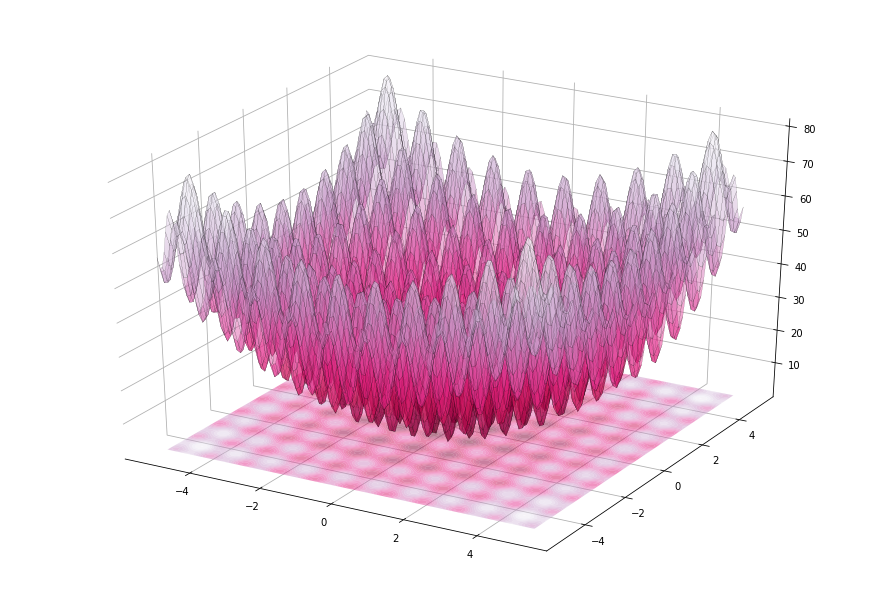

Levy 2D


In [34]:
problem = Rastrigin()
problem.plot3d()
print(Levy())

In [151]:
from yabox import DE
DE(F, [(-2, 2)]*2).solve()

(array([[0., 0.],
        [0., 0.]]), 0.0)

In [31]:
f = lambda x: sum(x**2)/len(x)
x=np.array([1,2])
f(x)

2.5